<a href="https://colab.research.google.com/github/jmins33/ml_edu/blob/master/ml_clf/boston_cross_val.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 교차 검증
- 교자 검증의 의미
- 실습



### 방법 1. 홀드아웃
- 데이터: 훈련데이터와 테스트데이터
- 훈련데이터: 훈련데이터 + 검증데이터 --> 테스트데이터
- 데이터의 수가 클 때 사용

### 방법 2. K폴드 교차검증
- 데이터의 수가 적을 때 주로 사용
- Default 연산량 X K개 만큼

- cross_val_score

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.datasets import load_boston

In [24]:
%matplotlib inline
boston = load_boston()

# pandas dataframe, 독립변수
bostonDF= pd.DataFrame(boston.data, columns=boston.feature_names)
bostonDF.shape

(506, 13)

In [25]:
#종속변수
bostonDF['PRICE'] = boston.target
print('size of dataset:', bostonDF.shape)

size of dataset: (506, 14)


In [26]:
bostonDF.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


### 데이터 탐색
- 시각화, 통계 검정
- 시각화는 각자 연습하기
- 변수 정의
- 타겟 데이터
 + PRICE: 1978 보스턴 주택 가격
- 특징 데이터
 + CRIM: 범죄율
 + ZN: 25,000 평방피트를 초과 거주지역 비율
 + INDUS: 비소매상업지역 면적 비율
 + CHAS: 찰스강의 경계에 위치한 경우는 1, 아니면 0
 + NOX: 일산화질소 농도
 + RM: 주택당 방 수
 + AGE: 1940년 이전에 건축된 주택의 비율
 + DIS: 직업센터의 거리
 + RAD: 방사형 고속도로까지의 거리
 + TAX: 재산세율  
 + PTRATIO: 학생/교사 비율
 + B: 인구 중 흑인 비율  
 + LSTAT: 인구 중 하위 계층 비율


 
 
 

 


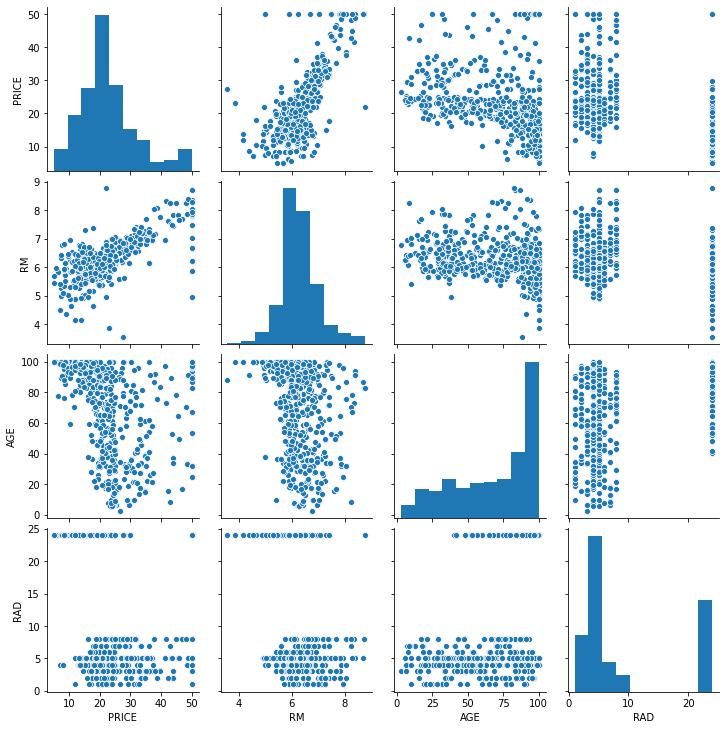

In [28]:
cols = ["PRICE", "RM", "AGE", "RAD"]
sns.pairplot(bostonDF[cols])
plt.show()

## 머신러닝 모형 만들기

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# 훈련 데이터, 테스트 분리
y_target = bostonDF['PRICE']
X_data = bostonDF.drop(['PRICE'], axis=1, inplace=False)

X_train, X_test, y_train, y_test = train_test_split(X_data, y_target, test_size= 0.3, random_state=1)

In [5]:
# 모형을 만들기 - 선형회귀
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [6]:
# 예측
y_preds = lr_model.predict(X_test)

- mean_squared_error (MSE) : ***실제값과 예측값의 차이***를 제곱 후 평균
- RMSE: 실제 오류 평균보다 더 커지는 특성이 있어서 루트 적용해야 값을 얻을 수 있다.

In [7]:
mse = mean_squared_error(y_test, y_preds)
print(mse)  # 오차

19.831323672062922


In [8]:
rmse= np.sqrt(mse)
print(rmse) # 오차에 루트 씌우기

4.4532374371981245


## K 폴드 적용
- cross_val_score()함수 활용해서 RMSE
- 5 폴드값

In [12]:
from sklearn.model_selection import cross_val_score

neg_mse_scores = cross_val_score(lr_model, X_data, y_target, scoring='neg_mean_squared_error', cv=5)
# 반환값이 음수로 나옴.
neg_mse_scores

array([-12.46030057, -26.04862111, -33.07413798, -80.76237112,
       -33.31360656])

In [13]:
# 마이너스를 없애야 해서 -1을 곱한다. 그리고 루트 씌우기
rmse_scores = np.sqrt(-1*neg_mse_scores)
print(rmse_scores)

[3.52991509 5.10378498 5.75101191 8.9867887  5.77179405]


In [14]:
# 오차 값들을 평균내기
np.mean(rmse_scores)

5.828658946215802